In [ ]:
# !pip install tfest

In [1]:
import tfest

In [2]:
import base64
import requests

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tfest

from scipy import signal

In [4]:
def get_values_from_github():
  sin_sweep = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/sin_sweep.csv").text
  after_filter = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/after_filter.csv").text
  
  # Last value is empty
  sin_sweep = np.array(sin_sweep.split("\n")[:-1]).astype(float)
  after_filter = np.array(after_filter.split("\n")[:-1]).astype(float)
  
  return sin_sweep, after_filter

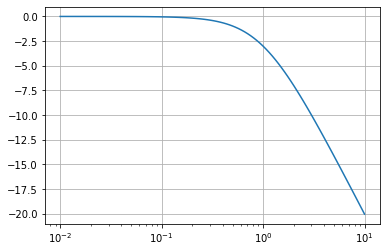

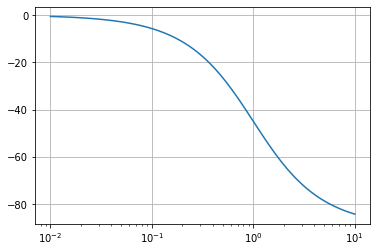

In [5]:
s1 = signal.lti([1], [1, 1])
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

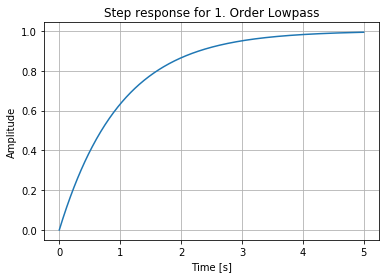

In [6]:
t = np.linspace(0, 5, num=500)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [7]:
u, y = get_values_from_github()

In [8]:
te = tfest.tfest(u=u, y=y)

In [9]:
te.estimate(nzeros=0, npoles=1, init_value=1)

Optimization terminated successfully.
         Current function value: 38.126592
         Iterations: 260
         Function evaluations: 466


 final_simplex: (array([[  6744.65562002,  27205.15378666, -50402.51537745],
       [  6744.65572713,  27205.15406002, -50402.51722312],
       [  6744.65586802,  27205.15461262, -50402.51718111],
       [  6744.65499824,  27205.15080309, -50402.51100061]]), array([38.12659235, 38.12659235, 38.12659235, 38.12659235]))
           fun: 38.126592346732906
       message: 'Optimization terminated successfully.'
          nfev: 466
           nit: 260
        status: 0
       success: True
             x: array([  6744.65562002,  27205.15378666, -50402.51537745])

In [10]:
te.get_transfer_function()

TransferFunctionContinuous(
array([-0.13381585]),
array([ 1.        , -0.53975786]),
dt: None
)

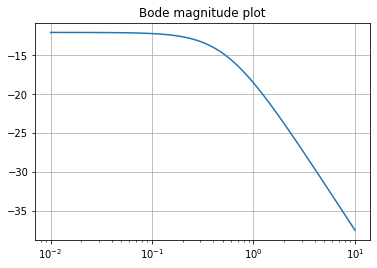

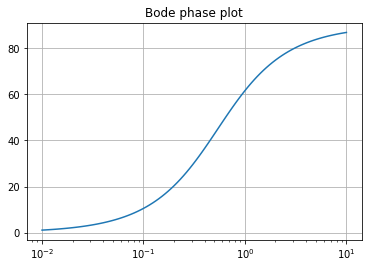

In [11]:
te.plot_bode()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


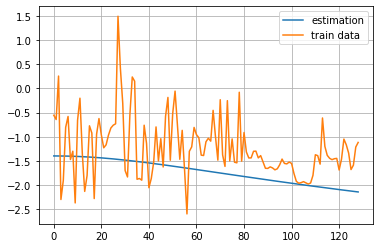

In [12]:
te.plot()

In [13]:
from matplotlib.mlab import psd, csd

In [14]:
cross_sd, f = csd(y, u)
power_sd, _ = psd(u)

In [15]:
H = cross_sd/power_sd

In [16]:
H[10]

(-0.25945479077699174+0.44959492022597136j)

In [17]:
1/(1+f[10]*1j)

(0.993933511283669-0.07765105556903665j)

In [18]:
a = np.array([(1+2j), (3+4j)])

In [19]:
np.linalg.norm(a.reshape(-1,1), axis=1).sum()

7.23606797749979

In [20]:
np.linalg.norm([[(1+2j)], [(3+4j)]], axis=1)

array([2.23606798, 5.        ])

In [21]:
np.__version__

'1.18.1'

In [22]:
np.linalg.norm((1+2j))

2.23606797749979